In [2]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

[27.488]


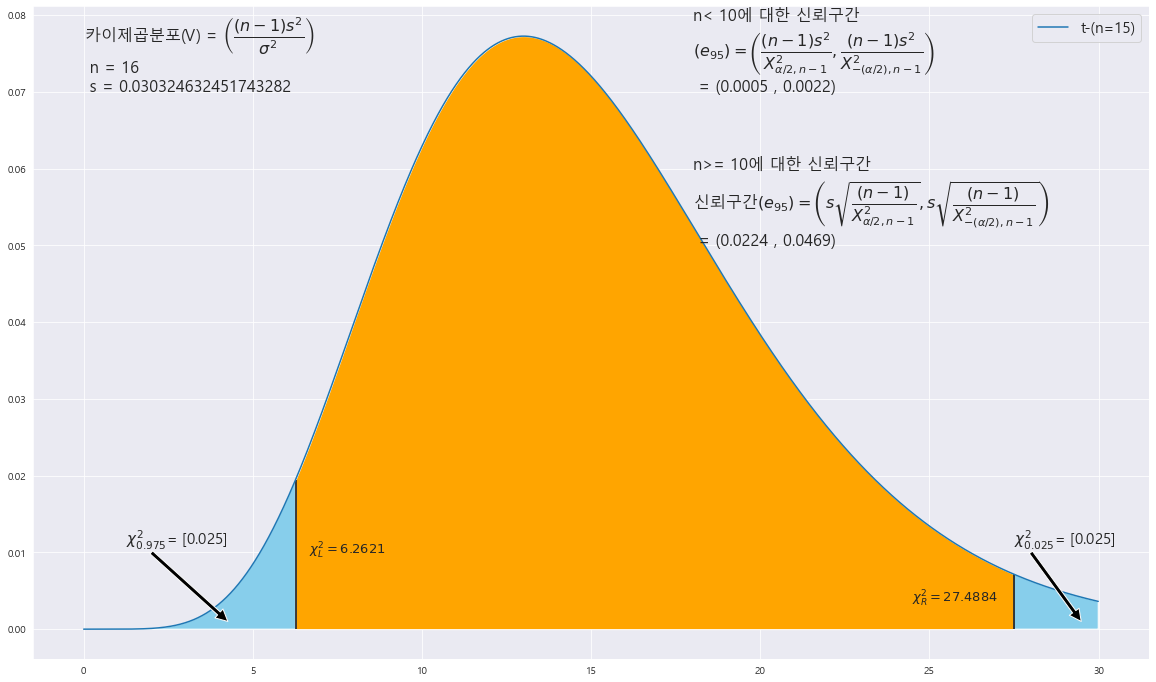

In [42]:
X = np.arange(0,30 , .01)

fig = plt.figure(figsize=(20,12))


A = '4.23 4.26 4.26 4.24 4.27 4.23 4.19 4.27 4.21 4.25 4.23 4.29 4.30 4.24 4.20 4.24'
A= list(map(float , A.split(' ')))

Vars = np.var(A , ddof=1)

dof_2 = [len(A)-1] #자유도

trust = 95
trust = round((1- trust/100)/2,3)

n = len(A)

STDS = math.sqrt(Vars)
ax = sns.lineplot(x = X , y=scipy.stats.chi2(dof_2).pdf(X) )
X_r =  scipy.stats.chi2(dof_2).ppf(1-trust)
X_l = scipy.stats.chi2(dof_2).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(X_r)


ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_r) | (X<=X_l) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X<=X_r) & (X>=X_l) , facecolor = 'orange')



ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_r) , colors = 'black')
ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r + 2, .001), xytext=(28 , .01)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_l - 2, .001), xytext=(2 , .01)  , arrowprops = dict(facecolor = 'black'))
area = 1- scipy.stats.chi2(dof_2).cdf(X_r)
ax.text(X_r , .011, r'$\chi^2_{%.3f}$' % trust + f'= {area}',fontsize=15)
ax.text(X_l- 5 , .011, r'$\chi^2_{%.3f}$' % (1-trust) + f'= {area}',fontsize=15)


ax.text(18 , 0.07 , f'n< 10에 대한 신뢰구간\n' + r'$(e_{%d})= \left(\dfrac{(n-1)s^{2}}{X^2_{\alpha/2 , n-1}} ,\dfrac{(n-1)s^{2}}{X^2_{-(\alpha/2) , n-1}} \right)$' % ((1- (trust*2))*100) + f'\n = ({round(float((n-1) * STDS**2 / X_r),5)} , {round(float((n-1) * STDS**2 / X_l),5)})' , fontsize = 16)
ax.text(18 , 0.05 ,f'n>= 10에 대한 신뢰구간\n' +  r'신뢰구간$(e_{%d}) = \left(s\sqrt{\dfrac{(n-1)}{X^2_{\alpha/2 , n-1}}} ,s\sqrt{\dfrac{(n-1)}{X^2_{-(\alpha/2) , n-1}}} \right)$' % ((1- (trust*2))*100) + f'\n = ({round(math.sqrt((n-1) * STDS**2 / X_r),4)} , {round(math.sqrt((n-1) * STDS**2 / X_l),4)})' , fontsize = 16)
ax.text(0 , 0.07 , r'카이제곱분포(V) = $\left(\dfrac{(n-1)s^{2}}{\sigma^{2}}\right)$' + f'\n n = {n}\n s = {STDS}' , fontsize = 16)


ax.text(X_l + 0.4 , scipy.stats.chi2(dof_2).pdf(X_l)/2 , r'$\chi^2_L= {%.4f}$' % X_l  , fontsize = 13)
ax.text(X_r - 3 , scipy.stats.chi2(dof_2).pdf(X_r)/2 , r'$\chi^2_R= {%.4f}$' % X_r   , fontsize = 13)


b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[24.736]


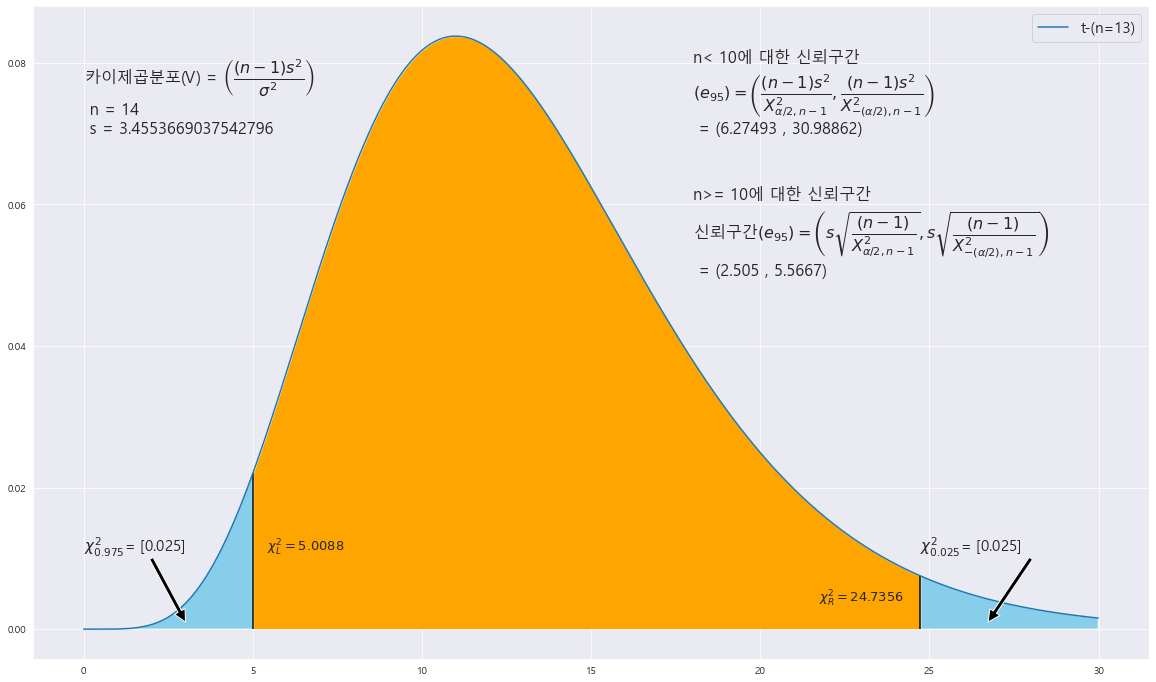

In [43]:
X = np.arange(0,30 , .01)

fig = plt.figure(figsize=(20,12))


A = '12.5 11.5 6.0 5.5 15.5 11.5 10.5 17.5 10.0 9.5 13.5 8.5 11.5 15.5'
A= list(map(float , A.split(' ')))

Vars = np.var(A , ddof=1)

dof_2 = [len(A)-1] #자유도

trust = 95
trust = round((1- trust/100)/2,3)

n = len(A)

STDS = math.sqrt(Vars)
ax = sns.lineplot(x = X , y=scipy.stats.chi2(dof_2).pdf(X) )
X_r =  scipy.stats.chi2(dof_2).ppf(1-trust)
X_l = scipy.stats.chi2(dof_2).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(X_r)


ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_r) | (X<=X_l) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X<=X_r) & (X>=X_l) , facecolor = 'orange')



ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_r) , colors = 'black')
ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r + 2, .001), xytext=(28 , .01)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_l - 2, .001), xytext=(2 , .01)  , arrowprops = dict(facecolor = 'black'))
area = 1- scipy.stats.chi2(dof_2).cdf(X_r)
ax.text(X_r , .011, r'$\chi^2_{%.3f}$' % trust + f'= {area}',fontsize=15)
ax.text(X_l- 5 , .011, r'$\chi^2_{%.3f}$' % (1-trust) + f'= {area}',fontsize=15)


ax.text(18 , 0.07 , f'n< 10에 대한 신뢰구간\n' + r'$(e_{%d})= \left(\dfrac{(n-1)s^{2}}{X^2_{\alpha/2 , n-1}} ,\dfrac{(n-1)s^{2}}{X^2_{-(\alpha/2) , n-1}} \right)$' % ((1- (trust*2))*100) + f'\n = ({round(float((n-1) * STDS**2 / X_r),5)} , {round(float((n-1) * STDS**2 / X_l),5)})' , fontsize = 16)
ax.text(18 , 0.05 ,f'n>= 10에 대한 신뢰구간\n' +  r'신뢰구간$(e_{%d}) = \left(s\sqrt{\dfrac{(n-1)}{X^2_{\alpha/2 , n-1}}} ,s\sqrt{\dfrac{(n-1)}{X^2_{-(\alpha/2) , n-1}}} \right)$' % ((1- (trust*2))*100) + f'\n = ({round(math.sqrt((n-1) * STDS**2 / X_r),4)} , {round(math.sqrt((n-1) * STDS**2 / X_l),4)})' , fontsize = 16)
ax.text(0 , 0.07 , r'카이제곱분포(V) = $\left(\dfrac{(n-1)s^{2}}{\sigma^{2}}\right)$' + f'\n n = {n}\n s = {STDS}' , fontsize = 16)


ax.text(X_l + 0.4 , scipy.stats.chi2(dof_2).pdf(X_l)/2 , r'$\chi^2_L= {%.4f}$' % X_l  , fontsize = 13)
ax.text(X_r - 3 , scipy.stats.chi2(dof_2).pdf(X_r)/2 , r'$\chi^2_R= {%.4f}$' % X_r   , fontsize = 13)


b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

In [45]:
from scipy.stats import chi2_contingency

result = chi2_contingency(observed= A ,correction=True)
result

(0.000,
 1.000,
 0,
 array([12.5, 11.5,  6. ,  5.5, 15.5, 11.5, 10.5, 17.5, 10. ,  9.5, 13.5,
         8.5, 11.5, 15.5]))

[34.17]
X_L_1 : 8.888888888888891
35.8909


Text(18.501, [0.007], 'P-value : \nP(X<=8.8889) + P(X>=35.8909) \n = 0.0317')

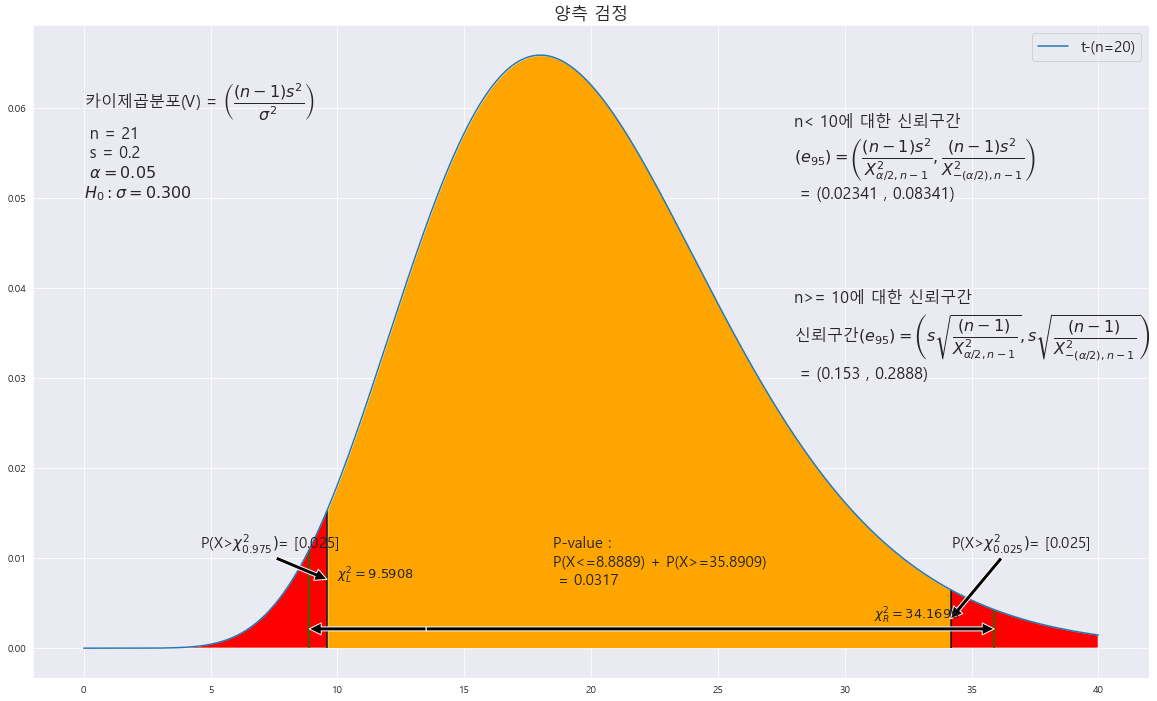

In [87]:
X = np.arange(0,40 , .01)

fig = plt.figure(figsize=(20,12))


# A = '12.5 11.5 6.0 5.5 15.5 11.5 10.5 17.5 10.0 9.5 13.5 8.5 11.5 15.5'
# A= list(map(float , A.split(' ')))

# Vars = np.var(A , ddof=1)
Vars = 0.2**2
n = 21
dof_2 = [n-1] #자유도

trust = 95
trust = round((1- trust/100)/2,3)



STDS = math.sqrt(Vars)
MO_std = 0.3


ax = sns.lineplot(x = X , y=scipy.stats.chi2(dof_2).pdf(X) )




X_r =  scipy.stats.chi2(dof_2).ppf(1-trust)
X_l = scipy.stats.chi2(dof_2).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(X_r)



ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X<=X_r) & (X>=X_l) , facecolor = 'orange')



ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_r) , colors = 'black')
ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r , scipy.stats.chi2(dof_2).pdf(X_r)/2), xytext=(X_r+2 ,.01)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_l , scipy.stats.chi2(dof_2).pdf(X_l)/2), xytext=(X_l - 2 , .01)  , arrowprops = dict(facecolor = 'black'))
area = 1- scipy.stats.chi2(dof_2).cdf(X_r)
ax.text(X_r , .011, r'P(X>$\chi^2_{%.3f})$' % trust + f'= {area}',fontsize=15)
ax.text(X_l- 5 , .011, r'P(X>$\chi^2_{%.3f})$' % (1-trust) + f'= {area}',fontsize=15)


ax.text(28 , 0.05 , f'n< 10에 대한 신뢰구간\n' + r'$(e_{%d})= \left(\dfrac{(n-1)s^{2}}{X^2_{\alpha/2 , n-1}} ,\dfrac{(n-1)s^{2}}{X^2_{-(\alpha/2) , n-1}} \right)$' % ((1- (trust*2))*100) + f'\n = ({round(float((n-1) * STDS**2 / X_r),5)} , {round(float((n-1) * STDS**2 / X_l),5)})' , fontsize = 16)
ax.text(28 , 0.03 ,f'n>= 10에 대한 신뢰구간\n' +  r'신뢰구간$(e_{%d}) = \left(s\sqrt{\dfrac{(n-1)}{X^2_{\alpha/2 , n-1}}} ,s\sqrt{\dfrac{(n-1)}{X^2_{-(\alpha/2) , n-1}}} \right)$' % ((1- (trust*2))*100) + f'\n = ({round(math.sqrt((n-1) * STDS**2 / X_r),4)} , {round(math.sqrt((n-1) * STDS**2 / X_l),4)})' , fontsize = 16)
ax.text(0 , 0.05 , r'카이제곱분포(V) = $\left(\dfrac{(n-1)s^{2}}{\sigma^{2}}\right)$' + f'\n n = {n}\n s = {STDS} \n ' + r'$\alpha = {%.2f}$' % (area*2) +'\n' + r'$H_0 : \sigma = {%.3f}$' % MO_std , fontsize = 16)


ax.text(X_l + 0.4 , scipy.stats.chi2(dof_2).pdf(X_l)/2 , r'$\chi^2_L= {%.4f}$' % X_l  , fontsize = 13)
ax.text(X_r - 3 , scipy.stats.chi2(dof_2).pdf(X_r)/2 , r'$\chi^2_R= {%.4f}$' % X_r   , fontsize = 13)


b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)


#=================================가설검정=====================================

ax.set_title('양측 검정' , fontsize = 17)

X_L_1 = (n-1) * Vars / (MO_std**2) #검정값
print(f'X_L_1 : {X_L_1}' )
X_L_1 = abs(round(X_L_1,4))

X_R_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)
print(X_R_1)
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_R_1) | (X<=X_L_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_r) | (X<=X_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔


area = round(float(scipy.stats.chi2(dof_2).cdf(X_L_1) + 1 - (scipy.stats.chi2(dof_2).cdf(X_R_1))),4)


ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
#
annotate_len = stats.chi2(dof_2).pdf(X_R_1) /2
plt.annotate('' , xy=(X_L_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text( (X_R_1-X_L_1)/2 + 5, annotate_len+0.005 , f'P-value : \nP(X<={X_L_1}) + P(X>={X_R_1}) \n = {area}',fontsize=15)



In [62]:
print(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(8.89)))

[35.888]


In [72]:
print(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(8.89)))

[35.888]


0.8944271909999159
X_r : [23.589]
X_l : [1.735]
X_L_1 : 7.83625
X_R_1 : 8.871


Text(5.5174, [0.052], 'P-value : \nP(X<=7.8362) + P(X>=8.871) \n = 0.8985')

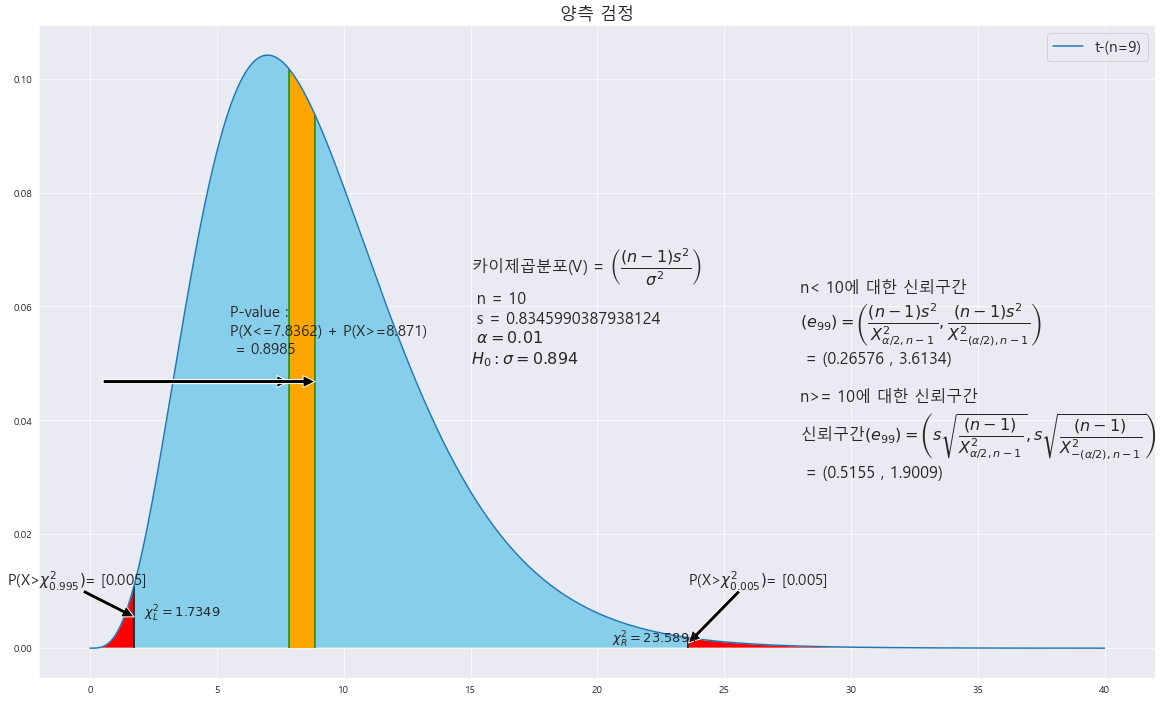

In [94]:
X = np.arange(0,40 , .01)

fig = plt.figure(figsize=(20,12))


A = '1.5 1.1 3.6 1.5 1.7 2.1 3.2 2.5 2.8 2.9'
A= list(map(float , A.split(' ')))

Vars = np.var(A , ddof=1)
# Vars = 0.2**2
n = len(A)
dof_2 = [n-1] #자유도

trust = 99
trust = round((1- trust/100)/2,3)



STDS = math.sqrt(Vars)
MO_std = math.sqrt(0.8)
print(MO_std)

ax = sns.lineplot(x = X , y=scipy.stats.chi2(dof_2).pdf(X) )




X_r =  scipy.stats.chi2(dof_2).ppf(1-trust)
X_l = scipy.stats.chi2(dof_2).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(f'X_r : {X_r}')
print(f'X_l : {X_l}')



ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X<=X_r) & (X>=X_l) , facecolor = 'orange')



ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_r) , colors = 'black')
ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r , scipy.stats.chi2(dof_2).pdf(X_r)/2), xytext=(X_r+2 ,.01)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_l , scipy.stats.chi2(dof_2).pdf(X_l)/2), xytext=(X_l - 2 , .01)  , arrowprops = dict(facecolor = 'black'))
area = 1- scipy.stats.chi2(dof_2).cdf(X_r)
ax.text(X_r , .011, r'P(X>$\chi^2_{%.3f})$' % trust + f'= {area}',fontsize=15)
ax.text(X_l- 5 , .011, r'P(X>$\chi^2_{%.3f})$' % (1-trust) + f'= {area}',fontsize=15)


ax.text(28 , 0.05 , f'n< 10에 대한 신뢰구간\n' + r'$(e_{%d})= \left(\dfrac{(n-1)s^{2}}{X^2_{\alpha/2 , n-1}} ,\dfrac{(n-1)s^{2}}{X^2_{-(\alpha/2) , n-1}} \right)$' % ((1- (trust*2))*100) + f'\n = ({round(float((n-1) * STDS**2 / X_r),5)} , {round(float((n-1) * STDS**2 / X_l),5)})' , fontsize = 16)
ax.text(28 , 0.03 ,f'n>= 10에 대한 신뢰구간\n' +  r'신뢰구간$(e_{%d}) = \left(s\sqrt{\dfrac{(n-1)}{X^2_{\alpha/2 , n-1}}} ,s\sqrt{\dfrac{(n-1)}{X^2_{-(\alpha/2) , n-1}}} \right)$' % ((1- (trust*2))*100) + f'\n = ({round(math.sqrt((n-1) * STDS**2 / X_r),4)} , {round(math.sqrt((n-1) * STDS**2 / X_l),4)})' , fontsize = 16)
ax.text(15 , 0.05 , r'카이제곱분포(V) = $\left(\dfrac{(n-1)s^{2}}{\sigma^{2}}\right)$' + f'\n n = {n}\n s = {STDS} \n ' + r'$\alpha = {%.2f}$' % (area*2) +'\n' + r'$H_0 : \sigma = {%.3f}$' % MO_std , fontsize = 16)


ax.text(X_l + 0.4 , scipy.stats.chi2(dof_2).pdf(X_l)/2 , r'$\chi^2_L= {%.4f}$' % X_l  , fontsize = 13)
ax.text(X_r - 3 , scipy.stats.chi2(dof_2).pdf(X_r)/2 , r'$\chi^2_R= {%.4f}$' % X_r   , fontsize = 13)


b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)


#=================================가설검정=====================================

ax.set_title('양측 검정' , fontsize = 17)

X_L_1 = (n-1) * Vars / (MO_std**2) #검정값
print(f'X_L_1 : {X_L_1}' )
X_L_1 = abs(round(X_L_1,4))

X_R_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)
print(f'X_R_1 : {X_R_1}' )
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_R_1) | (X<=X_L_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_r) | (X<=X_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔


area = round(float(scipy.stats.chi2(dof_2).cdf(X_L_1) + 1 - (scipy.stats.chi2(dof_2).cdf(X_R_1))),4)


ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
#
annotate_len = stats.chi2(dof_2).pdf(X_R_1) /2
plt.annotate('' , xy=(X_L_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text( (X_R_1-X_L_1)/2 + 5, annotate_len+0.005 , f'P-value : \nP(X<={X_L_1}) + P(X>={X_R_1}) \n = {area}',fontsize=15)



In [91]:
print(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(1.7349)))

[23.59]


1.2
X_l : [5.226]
X_L_1 : 5.6033333333333335


Text(11.2066, [0.021], 'P-value : \nP(V<=5.6033)) \n = 0.0653')

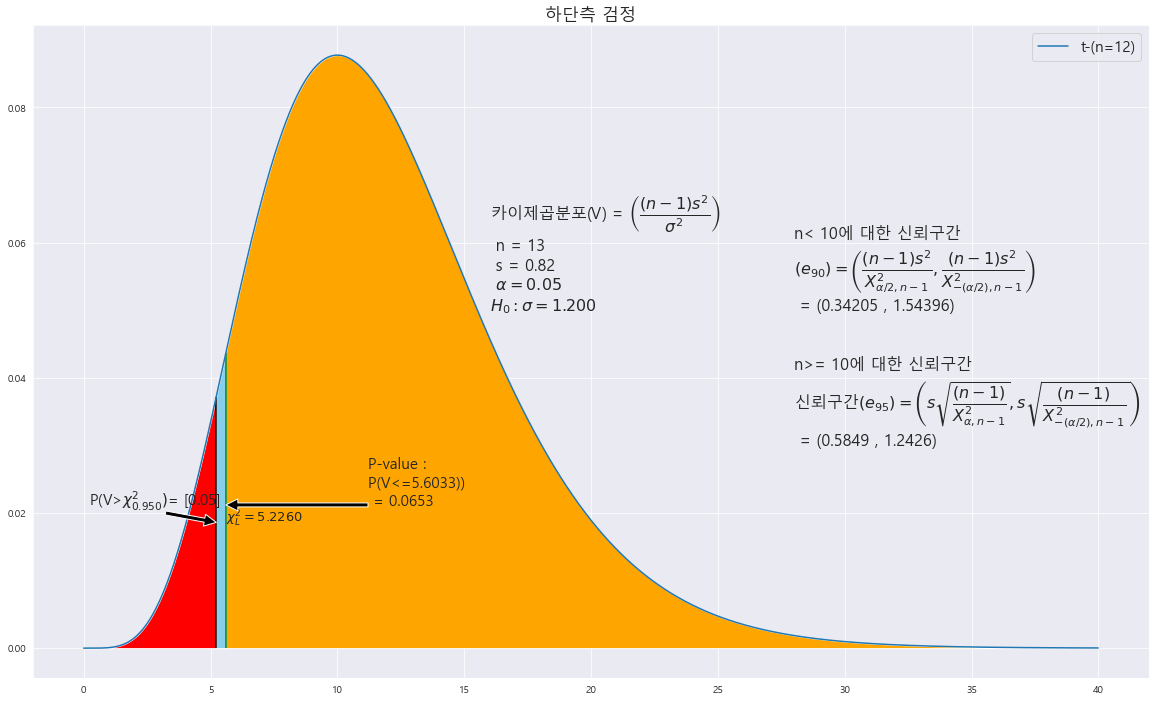

In [102]:
X = np.arange(0,40 , .01)

fig = plt.figure(figsize=(20,12))


# A = '1.5 1.1 3.6 1.5 1.7 2.1 3.2 2.5 2.8 2.9'
# A= list(map(float , A.split(' ')))

# Vars = np.var(A , ddof=1)
Vars = 0.82**2
n = 13
dof_2 = [n-1] #자유도

trust = 95
trust = round((1- trust/100),3)



STDS = math.sqrt(Vars)
MO_std = 1.2
print(MO_std)

ax = sns.lineplot(x = X , y=scipy.stats.chi2(dof_2).pdf(X) )




# X_r =  scipy.stats.chi2(dof_2).ppf(1-trust)
X_l = scipy.stats.chi2(dof_2).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
# print(f'X_r : {X_r}')
print(f'X_l : {X_l}')



ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where =  (X>=X_l) , facecolor = 'orange')



# ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_r) , colors = 'black')
ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_l) , colors = 'black')
# plt.annotate('' , xy=(X_r , scipy.stats.chi2(dof_2).pdf(X_r)/2), xytext=(X_r+2 ,.01)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_l , scipy.stats.chi2(dof_2).pdf(X_l)/2), xytext=(X_l - 2 , .02)  , arrowprops = dict(facecolor = 'black'))
area = scipy.stats.chi2(dof_2).cdf(X_l)
# ax.text(X_r , .011, r'P(X>$\chi^2_{%.3f})$' % trust + f'= {area}',fontsize=15)
ax.text(X_l- 5 , .021, r'P(V>$\chi^2_{%.3f})$' % (1-trust) + f'= {area}',fontsize=15)


ax.text(28 , 0.05 , f'n< 10에 대한 신뢰구간\n' + r'$(e_{%d})= \left(\dfrac{(n-1)s^{2}}{X^2_{\alpha/2 , n-1}} ,\dfrac{(n-1)s^{2}}{X^2_{-(\alpha/2) , n-1}} \right)$' % ((1- (trust*2))*100) + f'\n = ({round(float((n-1) * STDS**2 / X_r),5)} , {round(float((n-1) * STDS**2 / X_l),5)})' , fontsize = 16)
ax.text(28 , 0.03 ,f'n>= 10에 대한 신뢰구간\n' +  r'신뢰구간$(e_{%d}) = \left(s\sqrt{\dfrac{(n-1)}{X^2_{\alpha , n-1}}} ,s\sqrt{\dfrac{(n-1)}{X^2_{-(\alpha/2) , n-1}}} \right)$' % ((1- (trust))*100) + f'\n = ({round(math.sqrt((n-1) * STDS**2 / X_r),4)} , {round(math.sqrt((n-1) * STDS**2 / X_l),4)})' , fontsize = 16)
ax.text(16 , 0.05 , r'카이제곱분포(V) = $\left(\dfrac{(n-1)s^{2}}{\sigma^{2}}\right)$' + f'\n n = {n}\n s = {STDS} \n ' + r'$\alpha = {%.2f}$' % (area) +'\n' + r'$H_0 : \sigma = {%.3f}$' % MO_std , fontsize = 16)


ax.text(X_l + 0.4 , scipy.stats.chi2(dof_2).pdf(X_l)/2 , r'$\chi^2_L= {%.4f}$' % X_l  , fontsize = 13)
# ax.text(X_r - 3 , scipy.stats.chi2(dof_2).pdf(X_r)/2 , r'$\chi^2_R= {%.4f}$' % X_r   , fontsize = 13)


b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)


#=================================가설검정=====================================

ax.set_title('하단측 검정' , fontsize = 17)

X_L_1 = (n-1) * Vars / (MO_std**2) #검정값
print(f'X_L_1 : {X_L_1}' )
X_L_1 = abs(round(X_L_1,4))

# X_R_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)
# print(f'X_R_1 : {X_R_1}' )
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where =  (X<=X_L_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where =  (X<=X_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔


area = round(float(scipy.stats.chi2(dof_2).cdf(X_L_1)),4)


ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
#
annotate_len = stats.chi2(dof_2).pdf(X_R_1) /2
plt.annotate('' , xy=(X_L_1, annotate_len/2), xytext=((X_L_1)*2 , annotate_len/2)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text( (X_L_1)*2 , annotate_len/2 , f'P-value : \nP(V<={X_L_1})) \n = {area}',fontsize=15)



0.09
X_l : [4.575]
X_L_1 : 3.395061728395062


Text(6.7902, [0.005], 'P-value : \nP(V<=3.3951)) \n = 0.0156')

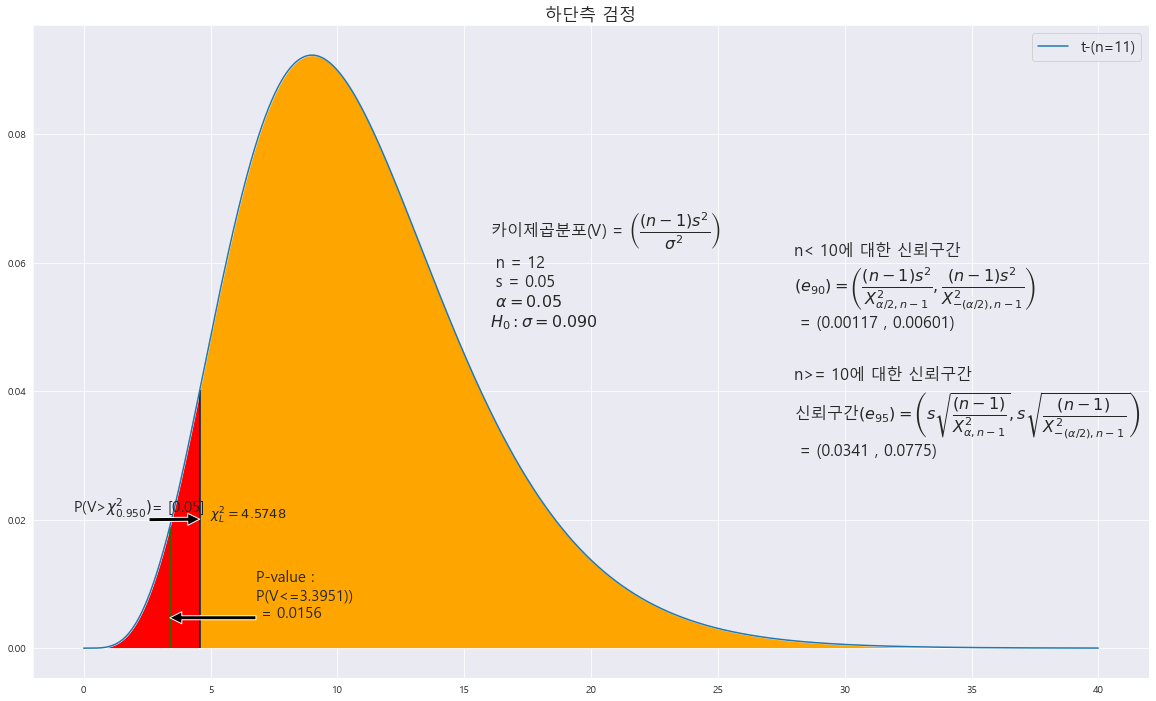

In [105]:
X = np.arange(0,40 , .01)

fig = plt.figure(figsize=(20,12))


# A = '1.5 1.1 3.6 1.5 1.7 2.1 3.2 2.5 2.8 2.9'
# A= list(map(float , A.split(' ')))

# Vars = np.var(A , ddof=1)
Vars = 0.05**2
n = 12
dof_2 = [n-1] #자유도

trust = 95
trust = round((1- trust/100),3)



STDS = math.sqrt(Vars)
MO_std = 0.09
print(MO_std)

ax = sns.lineplot(x = X , y=scipy.stats.chi2(dof_2).pdf(X) )




# X_r =  scipy.stats.chi2(dof_2).ppf(1-trust)
X_l = scipy.stats.chi2(dof_2).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
# print(f'X_r : {X_r}')
print(f'X_l : {X_l}')



ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where =  (X>=X_l) , facecolor = 'orange')



# ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_r) , colors = 'black')
ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_l) , colors = 'black')
# plt.annotate('' , xy=(X_r , scipy.stats.chi2(dof_2).pdf(X_r)/2), xytext=(X_r+2 ,.01)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_l , scipy.stats.chi2(dof_2).pdf(X_l)/2), xytext=(X_l - 2 , .02)  , arrowprops = dict(facecolor = 'black'))
area = scipy.stats.chi2(dof_2).cdf(X_l)
# ax.text(X_r , .011, r'P(X>$\chi^2_{%.3f})$' % trust + f'= {area}',fontsize=15)
ax.text(X_l- 5 , .021, r'P(V>$\chi^2_{%.3f})$' % (1-trust) + f'= {area}',fontsize=15)


ax.text(28 , 0.05 , f'n< 10에 대한 신뢰구간\n' + r'$(e_{%d})= \left(\dfrac{(n-1)s^{2}}{X^2_{\alpha/2 , n-1}} ,\dfrac{(n-1)s^{2}}{X^2_{-(\alpha/2) , n-1}} \right)$' % ((1- (trust*2))*100) + f'\n = ({round(float((n-1) * STDS**2 / X_r),5)} , {round(float((n-1) * STDS**2 / X_l),5)})' , fontsize = 16)
ax.text(28 , 0.03 ,f'n>= 10에 대한 신뢰구간\n' +  r'신뢰구간$(e_{%d}) = \left(s\sqrt{\dfrac{(n-1)}{X^2_{\alpha , n-1}}} ,s\sqrt{\dfrac{(n-1)}{X^2_{-(\alpha/2) , n-1}}} \right)$' % ((1- (trust))*100) + f'\n = ({round(math.sqrt((n-1) * STDS**2 / X_r),4)} , {round(math.sqrt((n-1) * STDS**2 / X_l),4)})' , fontsize = 16)
ax.text(16 , 0.05 , r'카이제곱분포(V) = $\left(\dfrac{(n-1)s^{2}}{\sigma^{2}}\right)$' + f'\n n = {n}\n s = {STDS} \n ' + r'$\alpha = {%.2f}$' % (area) +'\n' + r'$H_0 : \sigma = {%.3f}$' % MO_std , fontsize = 16)


ax.text(X_l + 0.4 , scipy.stats.chi2(dof_2).pdf(X_l)/2 , r'$\chi^2_L= {%.4f}$' % X_l  , fontsize = 13)
# ax.text(X_r - 3 , scipy.stats.chi2(dof_2).pdf(X_r)/2 , r'$\chi^2_R= {%.4f}$' % X_r   , fontsize = 13)


b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)


#=================================가설검정=====================================

ax.set_title('하단측 검정' , fontsize = 17)

X_L_1 = (n-1) * Vars / (MO_std**2) #검정값
print(f'X_L_1 : {X_L_1}' )
X_L_1 = abs(round(X_L_1,4))

# X_R_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)
# print(f'X_R_1 : {X_R_1}' )
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where =  (X<=X_L_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where =  (X<=X_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔


area = round(float(scipy.stats.chi2(dof_2).cdf(X_L_1)),4)


ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
#
annotate_len = stats.chi2(dof_2).pdf(X_L_1) /2
plt.annotate('' , xy=(X_L_1, annotate_len/2), xytext=((X_L_1)*2 , annotate_len/2)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text( (X_L_1)*2 , annotate_len/2 , f'P-value : \nP(V<={X_L_1})) \n = {area}',fontsize=15)



0.5477225575051661
X_r : [23.685]
X_l : [6.571]
X_R_1 : 22.400000000000006


Text(16.2, [0.014], 'P-value : \n P(X>=22.4) \n = 0.0708')

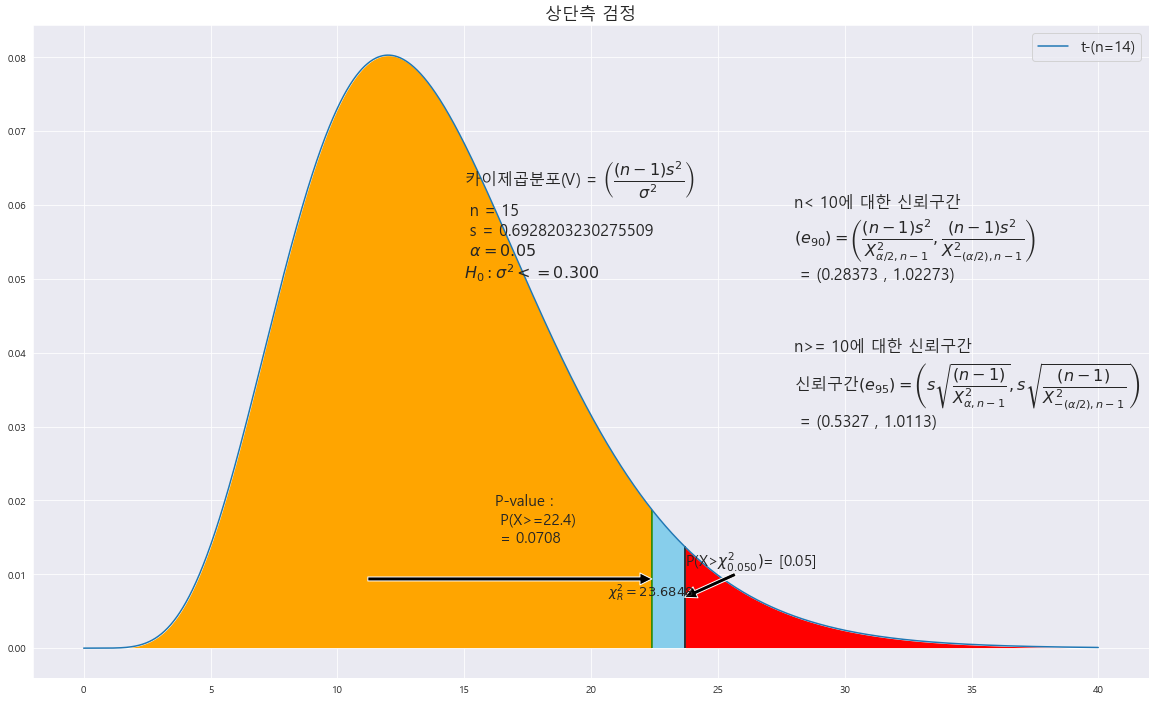

In [115]:
X = np.arange(0,40 , .01)

fig = plt.figure(figsize=(20,12))


# A = '1.5 1.1 3.6 1.5 1.7 2.1 3.2 2.5 2.8 2.9'
# A= list(map(float , A.split(' ')))

Vars = 0.48
# Vars = 0.2**2
n = 15
dof_2 = [n-1] #자유도

trust = 95
trust = round((1- trust/100),3)



STDS = math.sqrt(Vars)
MO_std = math.sqrt(0.3)
print(MO_std)

ax = sns.lineplot(x = X , y=scipy.stats.chi2(dof_2).pdf(X) )




X_r =  scipy.stats.chi2(dof_2).ppf(1-trust)
X_l = scipy.stats.chi2(dof_2).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(f'X_r : {X_r}')
print(f'X_l : {X_l}')



ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X<=X_r) , facecolor = 'orange')



ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_r) , colors = 'black')
# ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r , scipy.stats.chi2(dof_2).pdf(X_r)/2), xytext=(X_r+2 ,.01)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(X_l , scipy.stats.chi2(dof_2).pdf(X_l)/2), xytext=(X_l - 2 , .01)  , arrowprops = dict(facecolor = 'black'))
area = 1- scipy.stats.chi2(dof_2).cdf(X_r)
ax.text(X_r , .011, r'P(X>$\chi^2_{%.3f})$' % trust + f'= {area}',fontsize=15)
# ax.text(X_l- 5 , .011, r'P(X>$\chi^2_{%.3f})$' % (1-trust) + f'= {area}',fontsize=15)


ax.text(28 , 0.05 , f'n< 10에 대한 신뢰구간\n' + r'$(e_{%d})= \left(\dfrac{(n-1)s^{2}}{X^2_{\alpha/2 , n-1}} ,\dfrac{(n-1)s^{2}}{X^2_{-(\alpha/2) , n-1}} \right)$' % ((1- (trust*2))*100) + f'\n = ({round(float((n-1) * STDS**2 / X_r),5)} , {round(float((n-1) * STDS**2 / X_l),5)})' , fontsize = 16)
ax.text(28 , 0.03 ,f'n>= 10에 대한 신뢰구간\n' +  r'신뢰구간$(e_{%d}) = \left(s\sqrt{\dfrac{(n-1)}{X^2_{\alpha , n-1}}} ,s\sqrt{\dfrac{(n-1)}{X^2_{-(\alpha/2) , n-1}}} \right)$' % ((1- (trust))*100) + f'\n = ({round(math.sqrt((n-1) * STDS**2 / X_r),4)} , {round(math.sqrt((n-1) * STDS**2 / X_l),4)})' , fontsize = 16)
ax.text(15 , 0.05 , r'카이제곱분포(V) = $\left(\dfrac{(n-1)s^{2}}{\sigma^{2}}\right)$' + f'\n n = {n}\n s = {STDS} \n ' + r'$\alpha = {%.2f}$' % (area) +'\n' + r'$H_0 : \sigma^2 <= {%.3f}$' % (MO_std**2) , fontsize = 16)


# ax.text(X_l + 0.4 , scipy.stats.chi2(dof_2).pdf(X_l)/2 , r'$\chi^2_L= {%.4f}$' % X_l  , fontsize = 13)
ax.text(X_r - 3 , scipy.stats.chi2(dof_2).pdf(X_r)/2 , r'$\chi^2_R= {%.4f}$' % X_r   , fontsize = 13)


b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)


#=================================가설검정=====================================

ax.set_title('상단측 검정' , fontsize = 17)

X_R_1 = (n-1) * Vars / (MO_std**2) #검정값
print(f'X_R_1 : {X_R_1}' )
X_R_1 = abs(round(X_R_1,4))
#
# X_R_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)
# print(f'X_R_1 : {X_R_1}' )
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_R_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔


area = round(float( 1 - (scipy.stats.chi2(dof_2).cdf(X_R_1))),4)


# ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
#
annotate_len = stats.chi2(dof_2).pdf(X_R_1) /2
# plt.annotate('' , xy=(X_L_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text( (X_R_1)/2 + 5, annotate_len+0.005 , f'P-value : \n P(X>={X_R_1}) \n = {area}',fontsize=15)



2.1213203435596424
X_r : [26.296]
X_l : [7.962]
X_R_1 : 25.92000000000001


Text(17.96, [0.012], 'P-value : \n P(X>=25.92) \n = 0.0552')

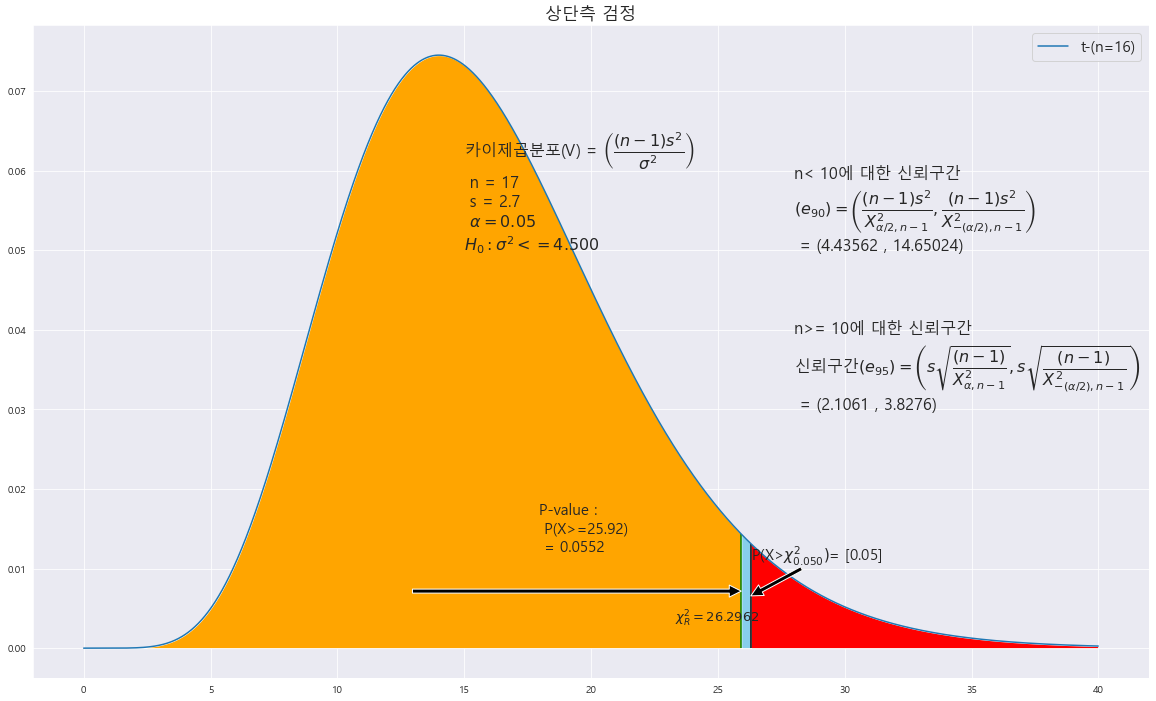

In [118]:
X = np.arange(0,40 , .01)

fig = plt.figure(figsize=(20,12))


# A = '1.5 1.1 3.6 1.5 1.7 2.1 3.2 2.5 2.8 2.9'
# A= list(map(float , A.split(' ')))

Vars = 2.7**2
# Vars = 0.2**2
n = 17
dof_2 = [n-1] #자유도

trust = 95
trust = round((1- trust/100),3)



STDS = math.sqrt(Vars)
MO_std = math.sqrt(4.5)
print(MO_std)

ax = sns.lineplot(x = X , y=scipy.stats.chi2(dof_2).pdf(X) )




X_r =  scipy.stats.chi2(dof_2).ppf(1-trust)
X_l = scipy.stats.chi2(dof_2).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(f'X_r : {X_r}')
print(f'X_l : {X_l}')



ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X<=X_r) , facecolor = 'orange')



ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_r) , colors = 'black')
# ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.chi2(dof_2).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r , scipy.stats.chi2(dof_2).pdf(X_r)/2), xytext=(X_r+2 ,.01)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(X_l , scipy.stats.chi2(dof_2).pdf(X_l)/2), xytext=(X_l - 2 , .01)  , arrowprops = dict(facecolor = 'black'))
area = 1- scipy.stats.chi2(dof_2).cdf(X_r)
ax.text(X_r , .011, r'P(X>$\chi^2_{%.3f})$' % trust + f'= {area}',fontsize=15)
# ax.text(X_l- 5 , .011, r'P(X>$\chi^2_{%.3f})$' % (1-trust) + f'= {area}',fontsize=15)


ax.text(28 , 0.05 , f'n< 10에 대한 신뢰구간\n' + r'$(e_{%d})= \left(\dfrac{(n-1)s^{2}}{X^2_{\alpha/2 , n-1}} ,\dfrac{(n-1)s^{2}}{X^2_{-(\alpha/2) , n-1}} \right)$' % ((1- (trust*2))*100) + f'\n = ({round(float((n-1) * STDS**2 / X_r),5)} , {round(float((n-1) * STDS**2 / X_l),5)})' , fontsize = 16)
ax.text(28 , 0.03 ,f'n>= 10에 대한 신뢰구간\n' +  r'신뢰구간$(e_{%d}) = \left(s\sqrt{\dfrac{(n-1)}{X^2_{\alpha , n-1}}} ,s\sqrt{\dfrac{(n-1)}{X^2_{-(\alpha/2) , n-1}}} \right)$' % ((1- (trust))*100) + f'\n = ({round(math.sqrt((n-1) * STDS**2 / X_r),4)} , {round(math.sqrt((n-1) * STDS**2 / X_l),4)})' , fontsize = 16)
ax.text(15 , 0.05 , r'카이제곱분포(V) = $\left(\dfrac{(n-1)s^{2}}{\sigma^{2}}\right)$' + f'\n n = {n}\n s = {STDS} \n ' + r'$\alpha = {%.2f}$' % (area) +'\n' + r'$H_0 : \sigma^2 <= {%.3f}$' % (MO_std**2) , fontsize = 16)


# ax.text(X_l + 0.4 , scipy.stats.chi2(dof_2).pdf(X_l)/2 , r'$\chi^2_L= {%.4f}$' % X_l  , fontsize = 13)
ax.text(X_r - 3 , scipy.stats.chi2(dof_2).pdf(X_r)/4 , r'$\chi^2_R= {%.4f}$' % X_r   , fontsize = 13)


b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)


#=================================가설검정=====================================

ax.set_title('상단측 검정' , fontsize = 17)

X_R_1 = (n-1) * Vars / (MO_std**2) #검정값
print(f'X_R_1 : {X_R_1}' )
X_R_1 = abs(round(X_R_1,4))
#
# X_R_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)
# print(f'X_R_1 : {X_R_1}' )
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_R_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔


area = round(float( 1 - (scipy.stats.chi2(dof_2).cdf(X_R_1))),4)


# ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
#
annotate_len = stats.chi2(dof_2).pdf(X_R_1) /2
# plt.annotate('' , xy=(X_L_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text( (X_R_1)/2 + 5, annotate_len+0.005 , f'P-value : \n P(X>={X_R_1}) \n = {area}',fontsize=15)



In [ ]:
X = np.arange(0,10, .01)

fig = plt.figure(figsize = (15,8))
dof = [[4,5]]
#print(dof[0][0])
for i in dof:
    ax = sns.lineplot(X , scipy.stats.f(i[0] , i[1]).pdf(X))
b = ['F({},{})'.format(i,j) for i,j in dof]


X_r = scipy.stats.f(dof[0][0], dof[0][1]).ppf(0.95)

X_l = scipy.stats.f(dof[0][0], dof[0][1]).ppf(0.05)

ax.fill_between(X, scipy.stats.f(dof[0][0],dof[0][1]).pdf(X) , where = (X>=X_r) | (X<=X_l) , facecolor = 'skyblue') # x값 , y값 , 0 , x조건 인곳 , 색깔


ax.vlines(X_r , ymin = 0 , ymax = scipy.stats.f(dof[0][0],dof[0][1]).pdf(X_r) , color = 'black')
ax.vlines(X_l , ymin = 0 , ymax = scipy.stats.f(dof[0][0],dof[0][1]).pdf(X_l) , color = 'black')


ax.annotate('' , xy=(X_l -0.02 , 0.1) , xytext=(X_l + 0.5 , 0.1) , arrowprops = dict(facecolor = 'black'))
ax.text(X_l + 0.5 , 0.1 , r'$P(F\leqq f_{0.95,4,5})$' + f'= {0.05}' , fontsize = 14)

ax.annotate('' , xy=(X_r +0.3 , 0.01) , xytext=(X_r + 0.3 , 0.2) , arrowprops = dict(facecolor = 'black'))
ax.text(X_r + 0.3 , 0.21 , r'$P(F\geqq f_{0.05,4,5})$' + f'= {0.05}' , fontsize = 14)

ax.text(X_l + 0.05 , 0.01 , r'$f_{0.95,4,5}$)' + f'= {round(scipy.stats.f(dof[0][0] , dof[0][1]).ppf(0.05) ,2)}' ,fontsize = 13)
ax.text(X_r - 1.3 , 0.01 , r'$f_{0.05,4,5}$)' + f'= {round(scipy.stats.f(dof[0][0] , dof[0][1]).ppf(0.95) , 2)}' ,fontsize = 13)


plt.legend(b , fontsize= 15)